In [2]:
# import libraries in need
import kagglehub
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the tep dataset
path = kagglehub.dataset_download("averkij/tennessee-eastman-process-simulation-dataset")

# import faulty and fualt-free files
df_fault = pyreadr.read_r(path+'/TEP_Faulty_Training.RData')
df_fault = df_fault['faulty_training']
df_fault = df_fault.astype({'faultNumber':'int', 'simulationRun':'int', 'sample':'int'})

df_free = pyreadr.read_r(path+'/TEP_FaultFree_Training.RData')
df_free = df_free['fault_free_training']
df_free = df_free.astype({'faultNumber':'int', 'simulationRun':'int', 'sample':'int'})

# and create a df with the two combined
df_combined = pd.concat([df_free, df_fault])

In [4]:
df_fault.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [13]:
# here we consider the sample 300 and runs ranging from 251 to 500 only; as these are turned out to be reliable in terms of stability in the previous study

df300 = df_combined[(df_combined['sample']==300)&(df_combined['simulationRun'].isin(range(251,501)))].reset_index(drop=True)
print(df300['faultNumber'].unique())
print(len(df300['simulationRun'].unique()))
df300.head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
250


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,251,300,0.20305,3698.8,4482.3,9.2595,26.793,42.436,2708.5,...,54.203,20.196,63.121,22.252,40.194,39.679,46.859,49.101,41.110,18.127
1,0,252,300,0.24326,3686.6,4540.0,9.4119,26.849,42.403,2709.9,...,54.365,23.866,60.723,23.155,38.859,42.388,45.395,49.644,41.595,18.041
2,0,253,300,0.26996,3646.7,4492.4,9.2690,27.143,42.438,2707.0,...,54.116,26.853,60.981,22.109,38.943,38.638,48.425,41.354,40.583,17.216
3,0,254,300,0.25681,3658.9,4533.6,9.4454,27.146,42.292,2699.0,...,54.187,25.318,61.115,21.860,41.538,30.212,44.957,51.392,41.442,17.046
4,0,255,300,0.23889,3734.2,4513.2,9.3680,27.122,42.397,2709.0,...,53.960,23.641,62.323,22.648,38.397,43.114,42.735,49.465,41.286,17.755


In [14]:
# drop redundant columns
df300 = df300.drop(columns=['simulationRun', 'sample'])

# to average out the values obtained from 250 runs, use .groupby
df300.groupby('faultNumber').mean()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
faultNumber,,,,,,,,,,,,,,,,,,,,,
0,0.248905,3667.5300,4514.8384,9.349642,26.937772,42.343028,2705.4820,75.087816,120.40176,0.336473,...,54.008224,24.486280,61.367852,22.262652,39.941320,38.203884,46.530972,47.820744,41.137388,18.090388
1,0.725093,3671.0636,4512.9772,8.926152,26.939064,42.369808,2718.8028,74.815360,120.39912,0.313664,...,53.985944,71.328448,58.588396,23.708360,36.696660,37.942392,46.245740,63.945764,41.535592,17.932244
2,0.281766,3697.1156,4656.8636,9.612371,26.937980,42.647396,2688.7056,75.117024,120.40180,0.682888,...,55.708388,27.718864,63.090904,21.093388,81.598884,37.644976,46.485240,23.271196,41.488216,16.796364
3,0.249087,3667.4844,4514.6628,9.349388,26.937776,42.342900,2705.4376,75.087196,120.40176,0.336447,...,54.006116,24.504168,61.366208,22.258396,39.939996,38.204532,46.531532,47.817088,41.212924,18.090736
4,0.248875,3667.5288,4514.8884,9.349483,26.937760,42.342972,2705.4684,75.088620,120.40120,0.336471,...,54.008856,24.483336,61.366864,22.261704,39.941520,38.203872,46.531088,47.815012,44.886276,18.090424
5,0.256378,3666.0564,4520.2304,9.293235,26.936556,42.302848,2703.6672,75.302648,120.40172,0.335036,...,54.072748,25.221316,60.998004,21.927672,39.937844,38.249516,46.589656,44.630320,40.962100,20.961796
6,0.000000,3616.3044,4253.1984,9.638663,26.880880,42.332960,3000.0124,73.933084,120.40436,0.214659,...,47.025000,99.972732,84.957248,34.109528,2.299864,39.006280,45.525852,100.154120,56.839607,29.840026
7,0.296505,3657.9064,4498.3512,9.199937,26.936612,42.252244,2697.6132,75.511260,120.40444,0.327447,...,53.810856,29.168616,75.470516,20.808540,39.510304,38.408632,46.761596,37.708260,40.599600,18.291208
8,0.265660,3662.7412,4498.6352,9.315045,26.938220,42.325740,2698.8816,75.025532,120.40360,0.329344,...,53.814264,26.134415,61.142036,22.528872,38.997601,38.262560,46.559228,51.683402,41.084512,18.093744


In [42]:
df300_mean = df300.groupby('faultNumber').mean().T
df300_mean.iloc[:5,:]

faultNumber,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
xmeas_1,0.248905,0.725093,0.281766,0.249087,0.248875,0.256378,0.000000,0.296505,0.265660,0.248733,...,0.248761,0.258863,0.258389,0.248928,0.248758,0.248392,0.251919,0.150430,0.248937,0.249368
xmeas_2,3667.530000,3671.063600,3697.115600,3667.484400,3667.528800,3666.056400,3616.304400,3657.906400,3662.741200,3667.568400,...,3667.398800,3664.577600,3661.297600,3667.357600,3667.524400,3667.521200,3665.956400,3703.079600,3667.493200,3666.595600
xmeas_3,4514.838400,4512.977200,4656.863600,4514.662800,4514.888400,4520.230400,4253.198400,4498.351200,4498.635200,4514.853600,...,4514.733200,4500.192000,4491.821600,4515.044400,4514.707600,4514.168400,4509.140400,4605.992800,4514.775600,4511.391600
xmeas_4,9.349642,8.926152,9.612371,9.349388,9.349483,9.293235,9.638663,9.199937,9.315045,9.351164,...,9.349340,9.392407,9.319658,9.349361,9.350633,9.354119,9.360798,10.112554,9.349785,9.353037
xmeas_5,26.937772,26.939064,26.937980,26.937776,26.937760,26.936556,26.880880,26.936612,26.938220,26.937776,...,26.937772,26.935240,26.938384,26.937032,26.937892,26.937844,26.930760,26.918764,26.945264,26.930436


In [43]:
# change its index to time step, namely, range(len(df300_mean.index))
# to this end, create a column first and set it as index
df300_mean['time'] = range(len(df300_mean.index))
df300_mean.set_index('time', inplace=True)

# change the names of columns to avoid any confusion
# df300_mean.rename(columns={i: str(i) + 'f' for i in df300_mean.columns}, inplace=True)

df300_mean.head()

faultNumber,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
time,,,,,,,,,,,,,,,,,,,,,
0,0.248905,0.725093,0.281766,0.249087,0.248875,0.256378,0.000000,0.296505,0.265660,0.248733,...,0.248761,0.258863,0.258389,0.248928,0.248758,0.248392,0.251919,0.150430,0.248937,0.249368
1,3667.530000,3671.063600,3697.115600,3667.484400,3667.528800,3666.056400,3616.304400,3657.906400,3662.741200,3667.568400,...,3667.398800,3664.577600,3661.297600,3667.357600,3667.524400,3667.521200,3665.956400,3703.079600,3667.493200,3666.595600
2,4514.838400,4512.977200,4656.863600,4514.662800,4514.888400,4520.230400,4253.198400,4498.351200,4498.635200,4514.853600,...,4514.733200,4500.192000,4491.821600,4515.044400,4514.707600,4514.168400,4509.140400,4605.992800,4514.775600,4511.391600
3,9.349642,8.926152,9.612371,9.349388,9.349483,9.293235,9.638663,9.199937,9.315045,9.351164,...,9.349340,9.392407,9.319658,9.349361,9.350633,9.354119,9.360798,10.112554,9.349785,9.353037
4,26.937772,26.939064,26.937980,26.937776,26.937760,26.936556,26.880880,26.936612,26.938220,26.937776,...,26.937772,26.935240,26.938384,26.937032,26.937892,26.937844,26.930760,26.918764,26.945264,26.930436


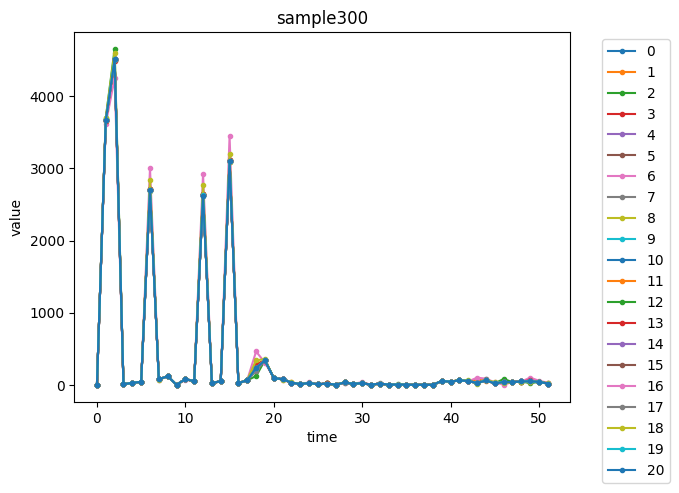

In [51]:
# visialize the dynamics of the variables
for i in range(21):
    plt.plot(df300_mean.loc[:,i], '.-')

plt.legend(range(21), bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('time')
plt.ylabel('value')
plt.title('sample300')
plt.show()

All the variables show more or less the same dymanics. 
Check this with another sample; let's say 400.

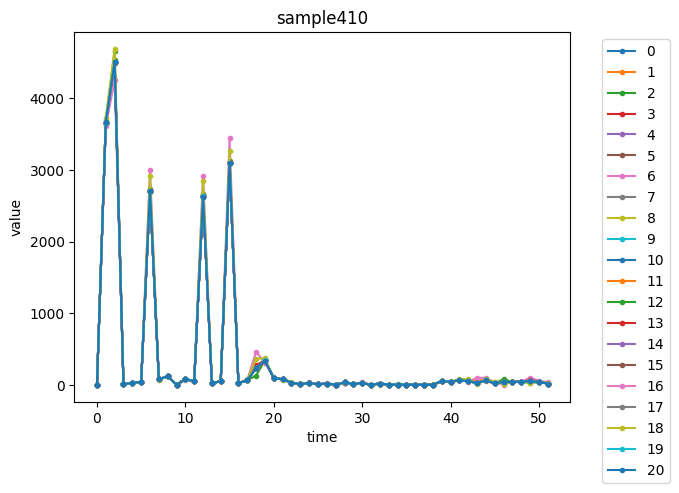

In [62]:
# as it is basically time series, 
df410 = df_combined[(df_combined['sample']==410)&(df_combined['simulationRun'].isin(range(251,501)))].reset_index(drop=True)
df410 = df410.drop(columns=['simulationRun', 'sample'])
df410_mean = df410.groupby('faultNumber').mean().T
df410_mean['time'] = range(len(df410_mean.index))
df410_mean.set_index('time', inplace=True)

# make a plot of it
for i in range(21):
    plt.plot(df410_mean.loc[:,i], '.-')

plt.legend(range(21), bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('time')
plt.ylabel('value')
plt.title('sample410')
plt.show()

In [67]:
# take a close took at the peaks
df410_mean[0].sort_values(ascending=False)[:10]

time
2     4512.621200
1     3663.989600
15    3102.576000
6     2705.292000
12    2634.061600
19     341.382640
18     231.545880
8      120.401080
20      94.606012
10      80.111556
Name: 0, dtype: float64

In [74]:
df410_mean[0].loc[2]

np.float64(4512.6212000000005)

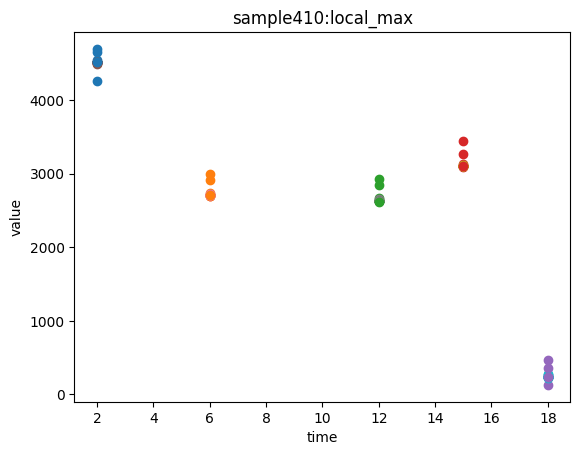

In [79]:
# make a scatter plot w.r.t local maximums
local_max = [2, 6, 12, 15, 18]

for i in range(21):
    for j in local_max:
        plt.scatter(j, df410_mean.loc[:,i][j])

# plt.legend(range(21), bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('time')
plt.ylabel('value')
plt.title('sample410:local_max')
plt.show()